In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_excel("placements_dataset.xlsx")
df.head()

,S.No,Gender,sse_p,hse_p,Board of Education,Specialization in HSE,Degree_p,Degree Type,No. of Internships,Work Experience,CGPA,No. of Arrears,Status
0,1,Male,62.0,93.9,CBSE,Commerce,86.3,B.Sc,0,Yes,7.5,7,Placed
1,2,Male,75.2,78.2,CBSE,Commerce,67.2,B.Sc,2,No,6.0,9,Not Placed
2,3,Female,68.5,86.5,CBSE,Arts,94.0,B.Tech,4,No,7.0,7,Not Placed
3,4,Male,73.1,85.7,ICSE,Arts,60.6,B.Tech,4,No,9.9,4,Placed
4,5,Male,90.4,83.9,State Board,Arts,68.3,B.Tech,3,Yes,9.9,9,Placed


In [3]:
df1 = df.copy()

In [4]:
df1.shape

(500, 13)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S.No                   500 non-null    int64  
 1   Gender                 500 non-null    object 
 2   sse_p                  500 non-null    float64
 3   hse_p                  500 non-null    float64
 4   Board of Education     500 non-null    object 
 5   Specialization in HSE  500 non-null    object 
 6   Degree_p               500 non-null    float64
 7   Degree Type            500 non-null    object 
 8   No. of Internships     500 non-null    int64  
 9   Work Experience        500 non-null    object 
 10  CGPA                   500 non-null    float64
 11  No. of Arrears         500 non-null    int64  
 12  Status                 500 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 50.9+ KB


In [6]:
df1.isnull().sum()

S.No                     0
Gender                   0
sse_p                    0
hse_p                    0
Board of Education       0
Specialization in HSE    0
Degree_p                 0
Degree Type              0
No. of Internships       0
Work Experience          0
CGPA                     0
No. of Arrears           0
Status                   0
dtype: int64

In [7]:
df1.drop(["S.No","Board of Education"],axis=1,inplace=True)

Text(0.5, 1.0, 'CGPA')

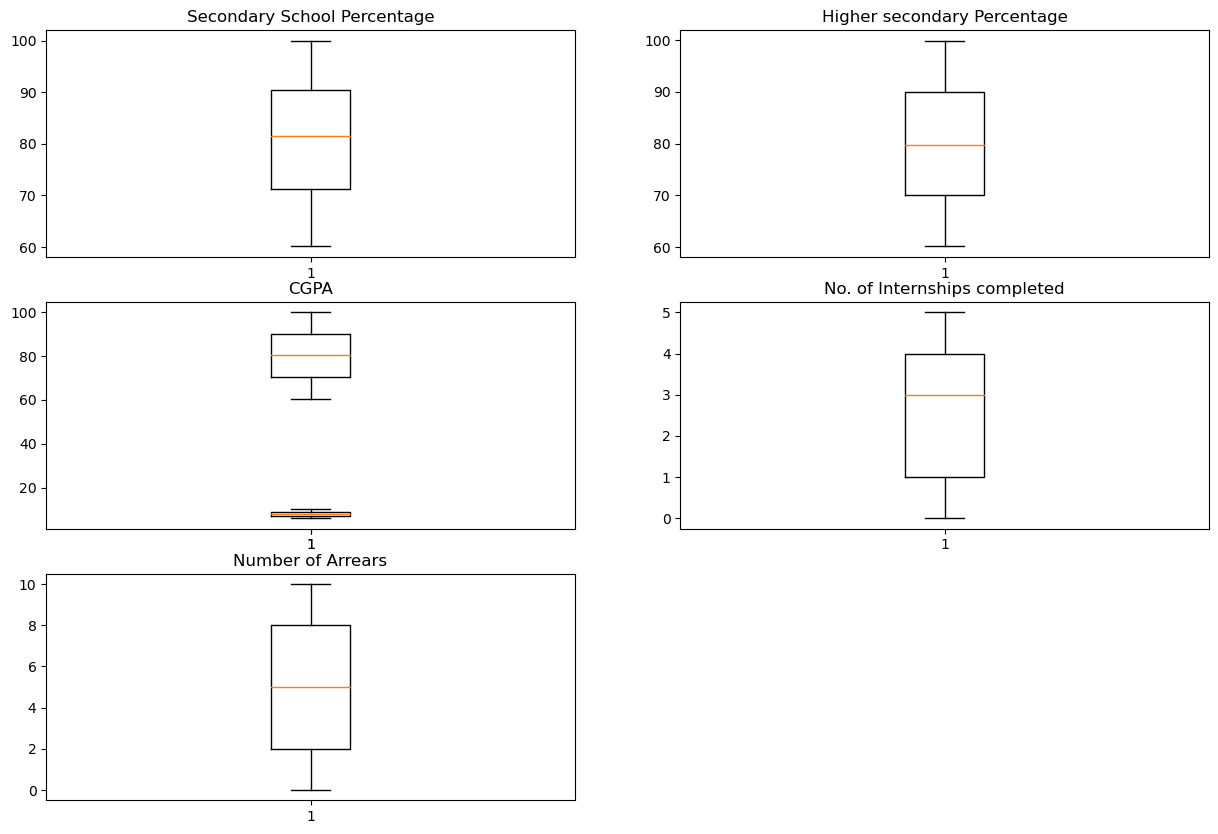

In [8]:
plt.figure(figsize = (15,10))

ax = plt.subplot(321)
plt.boxplot(df1['sse_p'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(322)
plt.boxplot(df1['hse_p'])
ax.set_title('Higher secondary Percentage')

ax = plt.subplot(323)
plt.boxplot(df1['Degree_p'])
ax.set_title('UG Percentage')

ax = plt.subplot(324)
plt.boxplot(df1['No. of Internships'])
ax.set_title('No. of Internships completed')

ax = plt.subplot(325)
plt.boxplot(df1['No. of Arrears'])
ax.set_title('Number of Arrears')

ax = plt.subplot(323)
plt.boxplot(df1['CGPA'])
ax.set_title('CGPA')

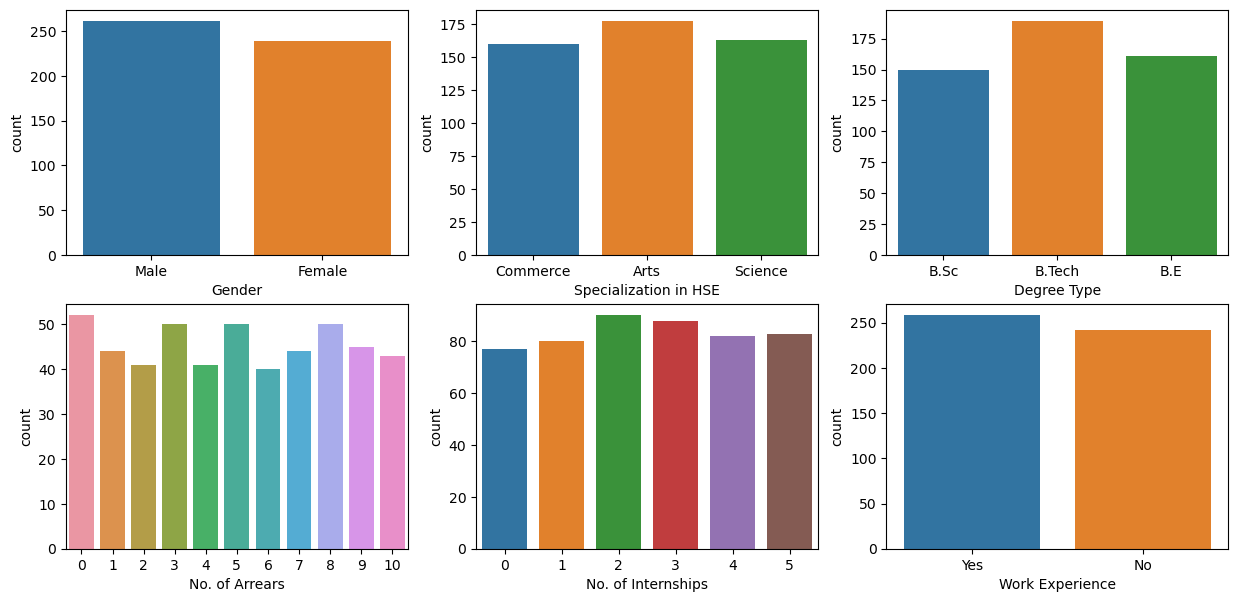

In [9]:
plt.figure(figsize = (15,7))

plt.subplot(231)
ax = sns.countplot(x= 'Gender' , data = df1)

plt.subplot(232)
ax = sns.countplot(x= 'Specialization in HSE', data = df1)

plt.subplot(233)
ax = sns.countplot(x= 'Degree Type' , data = df1)

plt.subplot(234)
ax = sns.countplot(x= 'No. of Arrears' , data =df1)

plt.subplot(235)
ax = sns.countplot(x= 'No. of Internships' , data = df1)

plt.subplot(236)
ax = sns.countplot(x= 'Work Experience', data = df1)

In [10]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

object_cols= ['Gender','Degree Type','Work Experience','Specialization in HSE','Status']

label_encoder = LabelEncoder()

for col in object_cols:
    df1[col]= label_encoder.fit_transform(df1[col])

df1.head(10)

,Gender,sse_p,hse_p,Specialization in HSE,Degree_p,Degree Type,No. of Internships,Work Experience,CGPA,No. of Arrears,Status
0,1,62.0,93.9,1,86.3,1,0,1,7.5,7,1
1,1,75.2,78.2,1,67.2,1,2,0,6.0,9,0
2,0,68.5,86.5,0,94.0,2,4,0,7.0,7,0
3,1,73.1,85.7,0,60.6,2,4,0,9.9,4,1
4,1,90.4,83.9,0,68.3,2,3,1,9.9,9,1
5,1,75.2,60.9,1,65.8,1,5,1,8.7,7,1
6,1,90.1,91.5,2,92.8,2,0,0,9.0,3,0
7,1,93.3,69.7,0,92.8,1,3,1,6.6,5,1
8,0,70.1,65.0,1,97.2,2,5,1,6.6,0,1
9,1,63.3,82.6,1,72.0,2,1,1,8.3,2,1


In [11]:
X=df1.drop('Status',axis=1)
y=df1['Status']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, params, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_

#  Model Training
final_rf_model = RandomForestClassifier(**best_params, random_state=42)
final_rf_model.fit(X, y)


# Predictions
y_pred = final_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:", best_params)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_selected.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # for binary classification
])

# Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
model.fit(X_selected, y, epochs=10, batch_size=32, validation_split=0.2)

y_pred = final_model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.svm import SVC

params = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC()
grid_search = GridSearchCV(svm, params, cv=5)
grid_search.fit(X_selected, y)
best_params = grid_search.best_params_

# Step 4: Model Training
final_svm_model = SVC(**best_params)
final_svm_model.fit(X_selected, y)

# Step 5: Model Evaluation

y_pred = final_model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)# Step 6: Save the Final Model
joblib.dump(final_svm_model, 'final_svm_model.joblib')

# Print the best hyperparameters
print("Best Hyperparameters for SVM:", best_params)

In [ ]:
import joblib

joblib.dump(final_rf_model,"final_random_forest_model.joblib")